The ad with the highest estimated probability is Microsoft Office 365


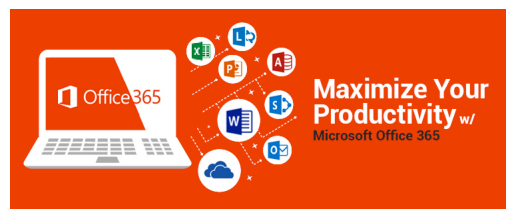

Estimated Probability: 0.5955


In [18]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display

class CustomBandit:
    def __init__(self, ad_data):
        self.ad_data = ad_data

    def display_ad(self, ad_index):
        # Simulate dynamic CTR by sampling from a distribution
        p = np.random.beta(self.ad_data[ad_index]['alpha'], self.ad_data[ad_index]['beta'])
        reward = np.random.binomial(n=1, p=p)
        return reward

# Your custom ad dataset with image filenames (assuming they are in the same folder as your notebook)
custom_ads = [
    {'name': 'McDonalds', 'alpha': 25, 'beta': 70, 'image_filename': 'mcd.jpeg'},
    {'name': 'Milo', 'alpha': 25, 'beta': 75, 'image_filename': 'milo.jpeg'},
    {'name': 'Microsoft Office 365', 'alpha': 60, 'beta': 40, 'image_filename': 'msoffice.jpg'},
    {'name': 'Samsung Galaxy S8+', 'alpha': 30, 'beta': 70, 'image_filename': 'samsung.jpeg'},
    {'name': 'Starbucks', 'alpha': 35, 'beta': 65, 'image_filename': 'starbucks.jpg'},
]

# Initialize the bandit environment
bandit_environment = CustomBandit(custom_ads)

n_prod = 100000
n_ads = len(custom_ads)  # Use the number of custom ads
alphas = np.ones(n_ads)
betas = np.ones(n_ads)
total_reward = 0
avg_rewards = []

for i in range(n_prod):
    theta_samples = [np.random.beta(alphas[k], betas[k]) for k in range(n_ads)]
    ad_chosen = np.argmax(theta_samples)
    R = bandit_environment.display_ad(ad_chosen)
    alphas[ad_chosen] += R
    betas[ad_chosen] += 1 - R
    total_reward += R
    avg_rewards_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_rewards_so_far)

# Calculate the ad with the highest estimated probability
ad_with_highest_probability = np.argmax(alphas / (alphas + betas))
ad_names = [ad['name'] for ad in custom_ads]
ad_banner = [ad['image_filename'] for ad in custom_ads]

# Specify the folder where your images are located (relative or absolute path)
image_folder = './ads_image'

# Print information about the ad with the highest probability
print(f"The ad with the highest estimated probability is {ad_names[ad_with_highest_probability]}")
image_path = os.path.join(image_folder, ad_banner[ad_with_highest_probability])
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()
print(f"Estimated Probability: {alphas[ad_with_highest_probability] / (alphas[ad_with_highest_probability] + betas[ad_with_highest_probability]):.4f}")


The ad with the highest estimated probability is Milo


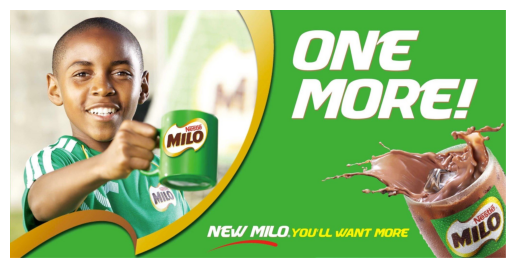

Estimated Probability: 0.2518


In [7]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

class CustomBandit:
    def __init__(self, ad_data, image_folder):
        self.ad_data = ad_data
        self.image_folder = image_folder

    def display_ad(self, ad_index):
        # Simulate dynamic CTR by sampling from a distribution
        p = np.random.beta(self.ad_data[ad_index]['alpha'], self.ad_data[ad_index]['beta'])
        
        # Display the ad image (you can customize this part)
        image_path = os.path.join(self.image_folder, self.ad_data[ad_index]['image_filename'])
        image = Image.open(image_path)
        # plt.imshow(image)
        # plt.axis('off')  # Hide axis
        # plt.show()
        
        # Simulate a click based on the sampled CTR
        reward = np.random.binomial(n=1, p=p)
        
        return reward

# Define your custom ad dataset with dynamic CTR represented as alpha and beta parameters
custom_ads_dynamic_ctr = [
    {'name': 'McDonalds', 'alpha': 25, 'beta': 75, 'image_filename': 'mcd.jpeg'},
    {'name': 'Milo', 'alpha': 25, 'beta': 75, 'image_filename': 'milo.jpeg'},
    {'name': 'Microsoft Office 365', 'alpha': 25, 'beta': 75, 'image_filename': 'msoffice.jpg'},
    {'name': 'Samsung Galaxy S8+', 'alpha': 25, 'beta': 75, 'image_filename': 'samsung.jpeg'},
    {'name': 'Starbucks', 'alpha': 25, 'beta': 75, 'image_filename': 'starbuck.jpg'},
]

# Specify the folder where your images are located (relative or absolute path)
image_folder = './ads_image'  # Update this to the actual path

# Initialize the bandit environment
bandit_environment = CustomBandit(custom_ads_dynamic_ctr, image_folder)

n_prod = 100000
n_ads = len(custom_ads_dynamic_ctr)  # Use the number of custom ads
alphas = np.ones(n_ads)
betas = np.ones(n_ads)
total_reward = 0
avg_rewards = []

for i in range(n_prod):
    theta_samples = [np.random.beta(alphas[k], betas[k]) for k in range(n_ads)]
    ad_chosen = np.argmax(theta_samples)
    R = bandit_environment.display_ad(ad_chosen)
    alphas[ad_chosen] += R
    betas[ad_chosen] += 1 - R
    total_reward += R
    avg_rewards_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_rewards_so_far)

# Calculate the ad with the highest estimated probability
ad_with_highest_probability = np.argmax(alphas / (alphas + betas))
ad_names = [ad['name'] for ad in custom_ads_dynamic_ctr]
ad_banner = [ad['image_filename'] for ad in custom_ads_dynamic_ctr]

# Print information about the ad with the highest probability
print(f"The ad with the highest estimated probability is {ad_names[ad_with_highest_probability]}")
image_path = os.path.join(image_folder, ad_banner[ad_with_highest_probability])
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()
print(f"Estimated Probability: {alphas[ad_with_highest_probability] / (alphas[ad_with_highest_probability] + betas[ad_with_highest_probability]):.4f}")
